In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [18]:
import sqlite3


with sqlite3.connect("../db.sqlite3") as conn:
    query_order = "SELECT * FROM restaurant_order"
    query_orderitem = "SELECT * FROM restaurant_orderitem"
    query_product = "SELECT * FROM restaurant_product"

    df_order = pd.read_sql_query(query_order, conn)
    df_orderitem = pd.read_sql_query(query_orderitem, conn)
    df_product = pd.read_sql_query(query_product, conn)

df_combined = df_order.merge(
    df_orderitem, left_on="id", right_on="order_id"
).merge(df_product, left_on="product_id", right_on="id")

df_combined.to_csv("combined_data.csv", index=False)

df_final = pd.read_csv("combined_data.csv")
print(f"Number of rows: {len(df_final)}")

Number of rows: 74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

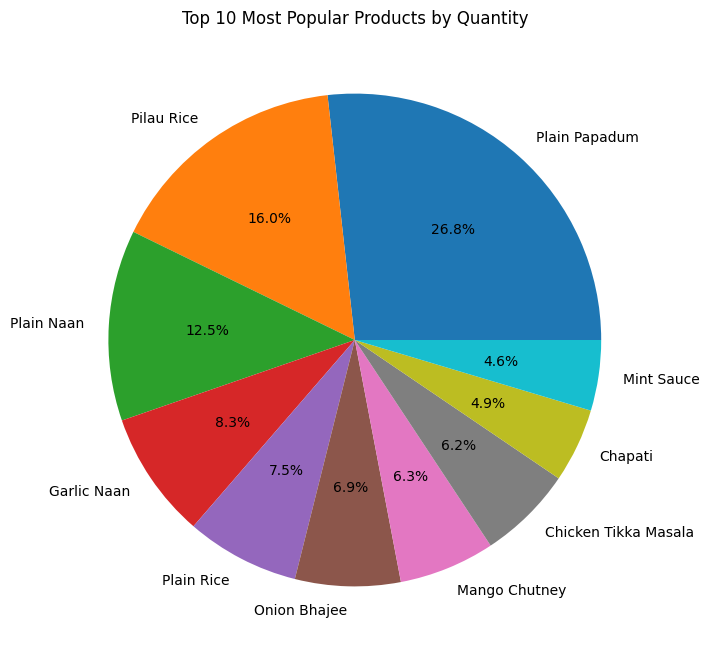

In [22]:
df = pd.read_csv("combined_data.csv")

product_counts = df_combined.groupby("name")["quantity"].sum().reset_index()
top_products = product_counts.nlargest(10, "quantity")

plt.figure(figsize=(10, 8))
plt.pie(top_products["quantity"], labels=top_products["name"], autopct="%1.1f%%")
plt.title("Top 10 Most Popular Products by Quantity")
plt.show()


\# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

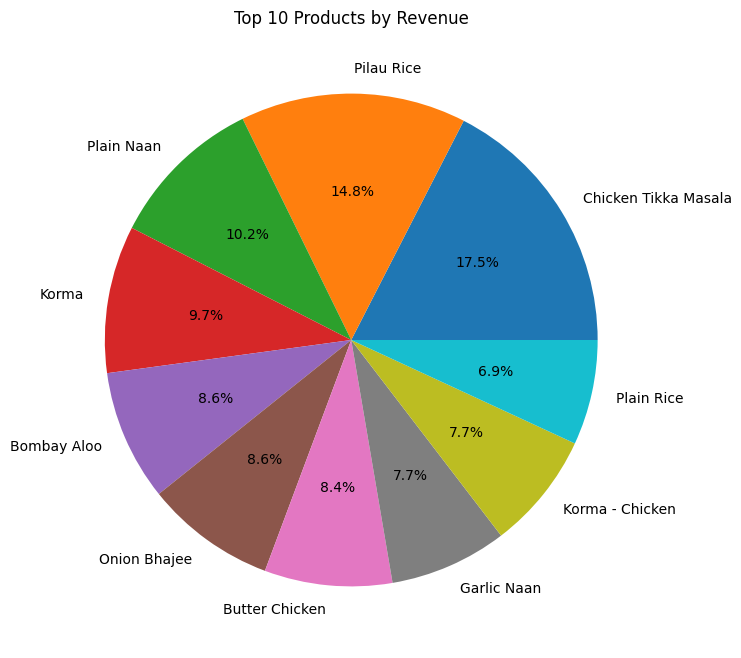

In [24]:
df["item_price"] = df["price"] * df["quantity"]

product_revenue = df.groupby("name")["item_price"].sum().reset_index()

top_revenue_products = product_revenue.nlargest(10, "item_price")

plt.figure(figsize=(10, 8))
plt.pie(top_revenue_products["item_price"], labels=top_revenue_products["name"], autopct="%1.1f%%")
plt.title("Top 10 Products by Revenue")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

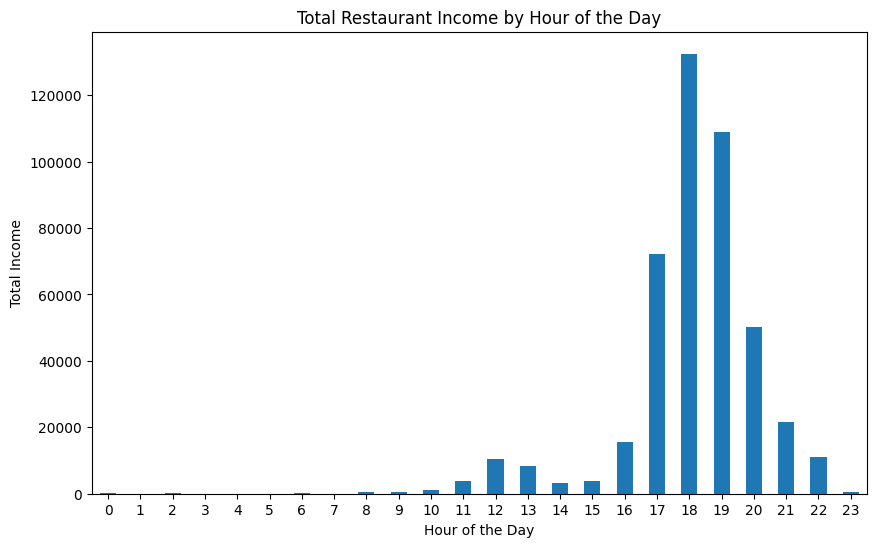

In [25]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["order_hour"] = df["datetime"].dt.hour

df["item_price"] = df["price"] * df["quantity"]

income_by_hour = df.groupby("order_hour")["item_price"].sum().reindex(range(24), fill_value=0)

plt.figure(figsize=(10, 6))
income_by_hour.plot(kind="bar")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Hour of the Day")
plt.xticks(range(24), range(24), rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

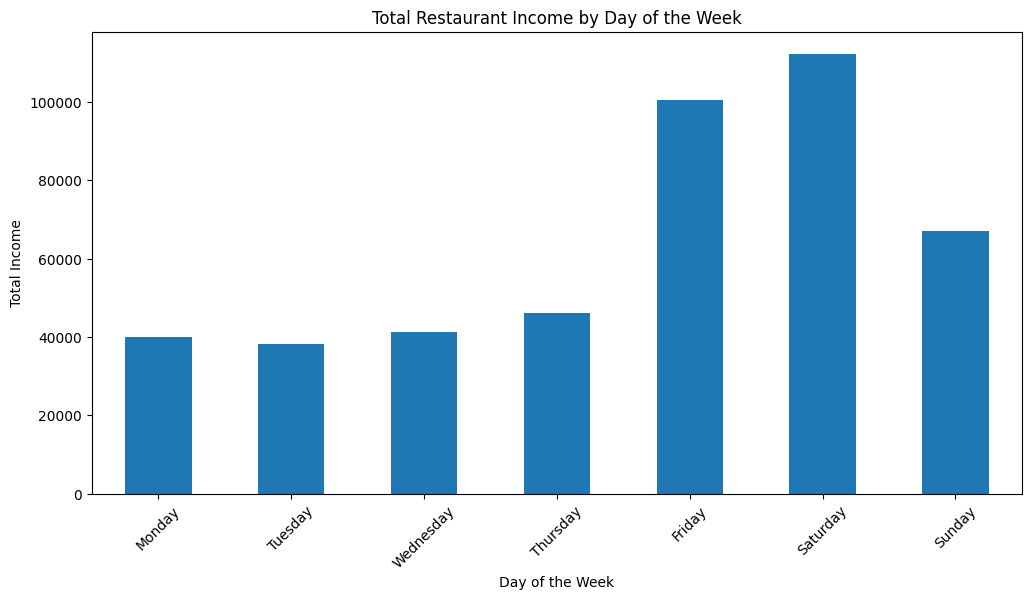

In [26]:
df["day_of_week"] = df["datetime"].dt.day_name()

df["item_price"] = df["price"] * df["quantity"]

income_by_day = df.groupby("day_of_week")["item_price"].sum()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
income_by_day = income_by_day.reindex(days_order, fill_value=0)


plt.figure(figsize=(12, 6))
income_by_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Day of the Week")
plt.xticks(rotation=45)
plt.show()